In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("cicddos2019_dataset.csv")
df

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,306196,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431367,306197,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431368,306198,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431369,306199,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [3]:
class_counts = df['Label'].value_counts()
print(class_counts)

Label
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: count, dtype: int64


In [4]:
#Combining Similar classes together
d = {'DrDoS_NTP':'NTP',
     'DrDoS_UDP':'UDP',
     'UDP-lag':'UDPLag',
     'DrDoS_MSSQL':'MSSQL',
     'DrDoS_DNS':'DNS',
     'DrDoS_SNMP':'SNMP',
     'DrDoS_LDAP':'LDAP',
     'DrDoS_NetBIOS':'NetBIOS'}
df['Label'] = df['Label'].apply(lambda x: d[x] if x in d else x)

In [5]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
class_counts = df['Label'].value_counts()
print(class_counts)

Label
NTP        121368
TFTP        98917
Benign      97831
Syn         49373
UDP         28510
MSSQL       14735
UDPLag       8927
DNS          3669
LDAP         3346
SNMP         2717
NetBIOS      1242
Portmap       685
WebDDoS        51
Name: count, dtype: int64


In [6]:
# Create a LabelEncoder instance and encode the "Label" column and rename it to "Target"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Label'])

# Create a mapping between original values and encoded values
encoding_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Encoding Mapping:")
for original_value, encoded_value in encoding_mapping.items():
    print(f"{original_value} => {encoded_value}")

# Print the DataFrame with the encoded values
print("\nDataFrame with Encoded Values:")
df

Encoding Mapping:
Benign => 0
DNS => 1
LDAP => 2
MSSQL => 3
NTP => 4
NetBIOS => 5
Portmap => 6
SNMP => 7
Syn => 8
TFTP => 9
UDP => 10
UDPLag => 11
WebDDoS => 12

DataFrame with Encoded Values:


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class,Target
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack,10
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack,10
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack,10
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack,10
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign,0
431367,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign,0
431368,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign,0
431369,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign,0


In [4]:
reverse_encoding={
     0:"Benign",
1:"DNS",
2:"LDAP",
3:'MSSQL',
4:"NTP",
5:"NetBIOS",
6:"Portmap",
 7:"SNMP",
 8:"Syn",
 9:"TFTP",
10:"UDP",
11:"UDPLag",
12:"WebDDoS"}


In [7]:
#Removing CLass and Label Column as they are redundant now
columns_to_remove = ['Label', 'Class']
df = df.drop(columns=columns_to_remove, axis=1)

#This is for removing Unnamed:0 column
df=selected_columns = df.iloc[:, 1:]
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Target
0,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431367,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431368,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431369,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,97.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# EXPLORATORY DATA ANALYSIS

In [8]:
numerical_summary = df.describe()
numerical_summary

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Target
count,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,...,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,431371.000000
mean,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,20.208259,79.579538,...,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06,5.189322
std,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,70.946085,490.692889,...,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06,3.658791
min,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000
50%,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,0.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000
75%,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,0.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000
max,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,2221.556200,37960.000000,...,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08,12.000000


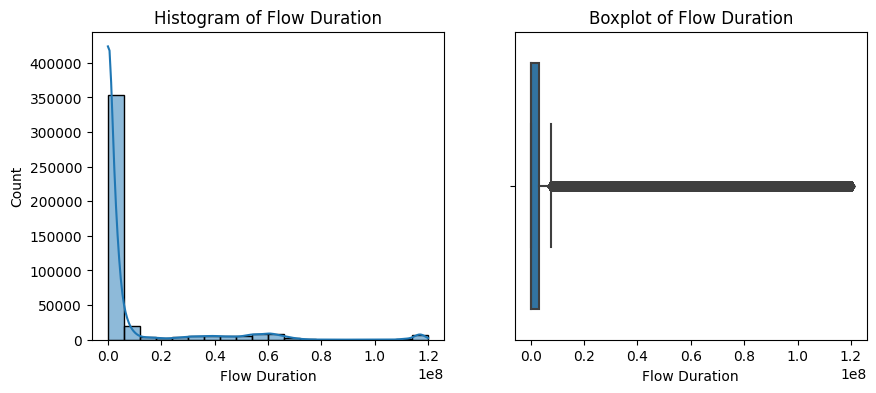

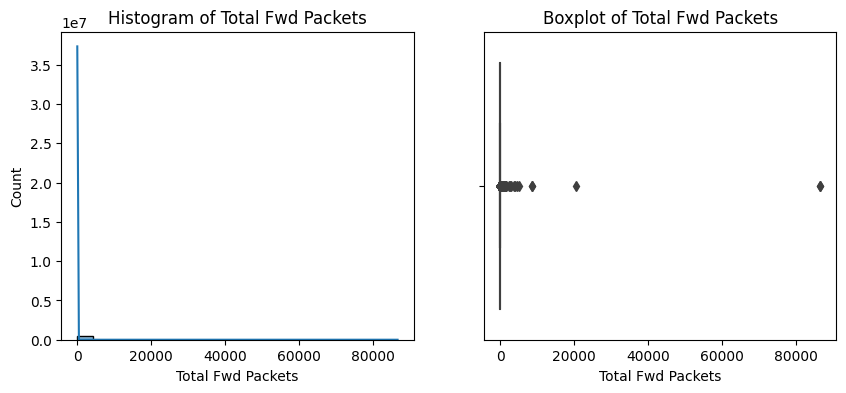

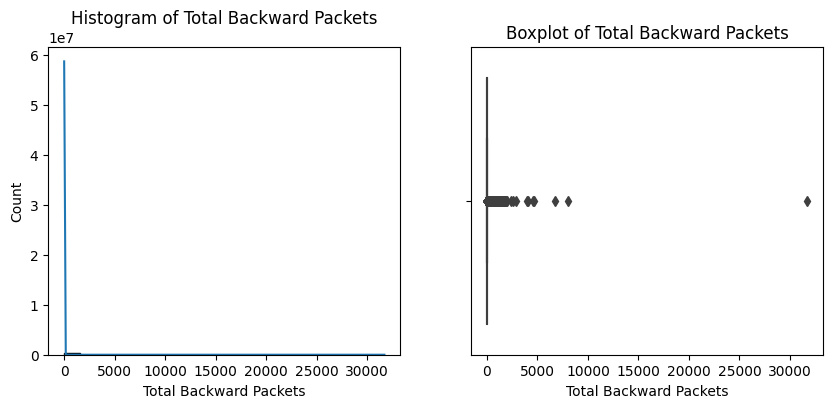

KeyboardInterrupt: 

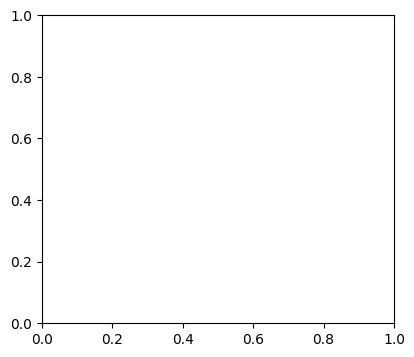

In [9]:
# Visualize numerical data using histograms and boxplots
numerical_columns = df.select_dtypes(include='number').columns

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

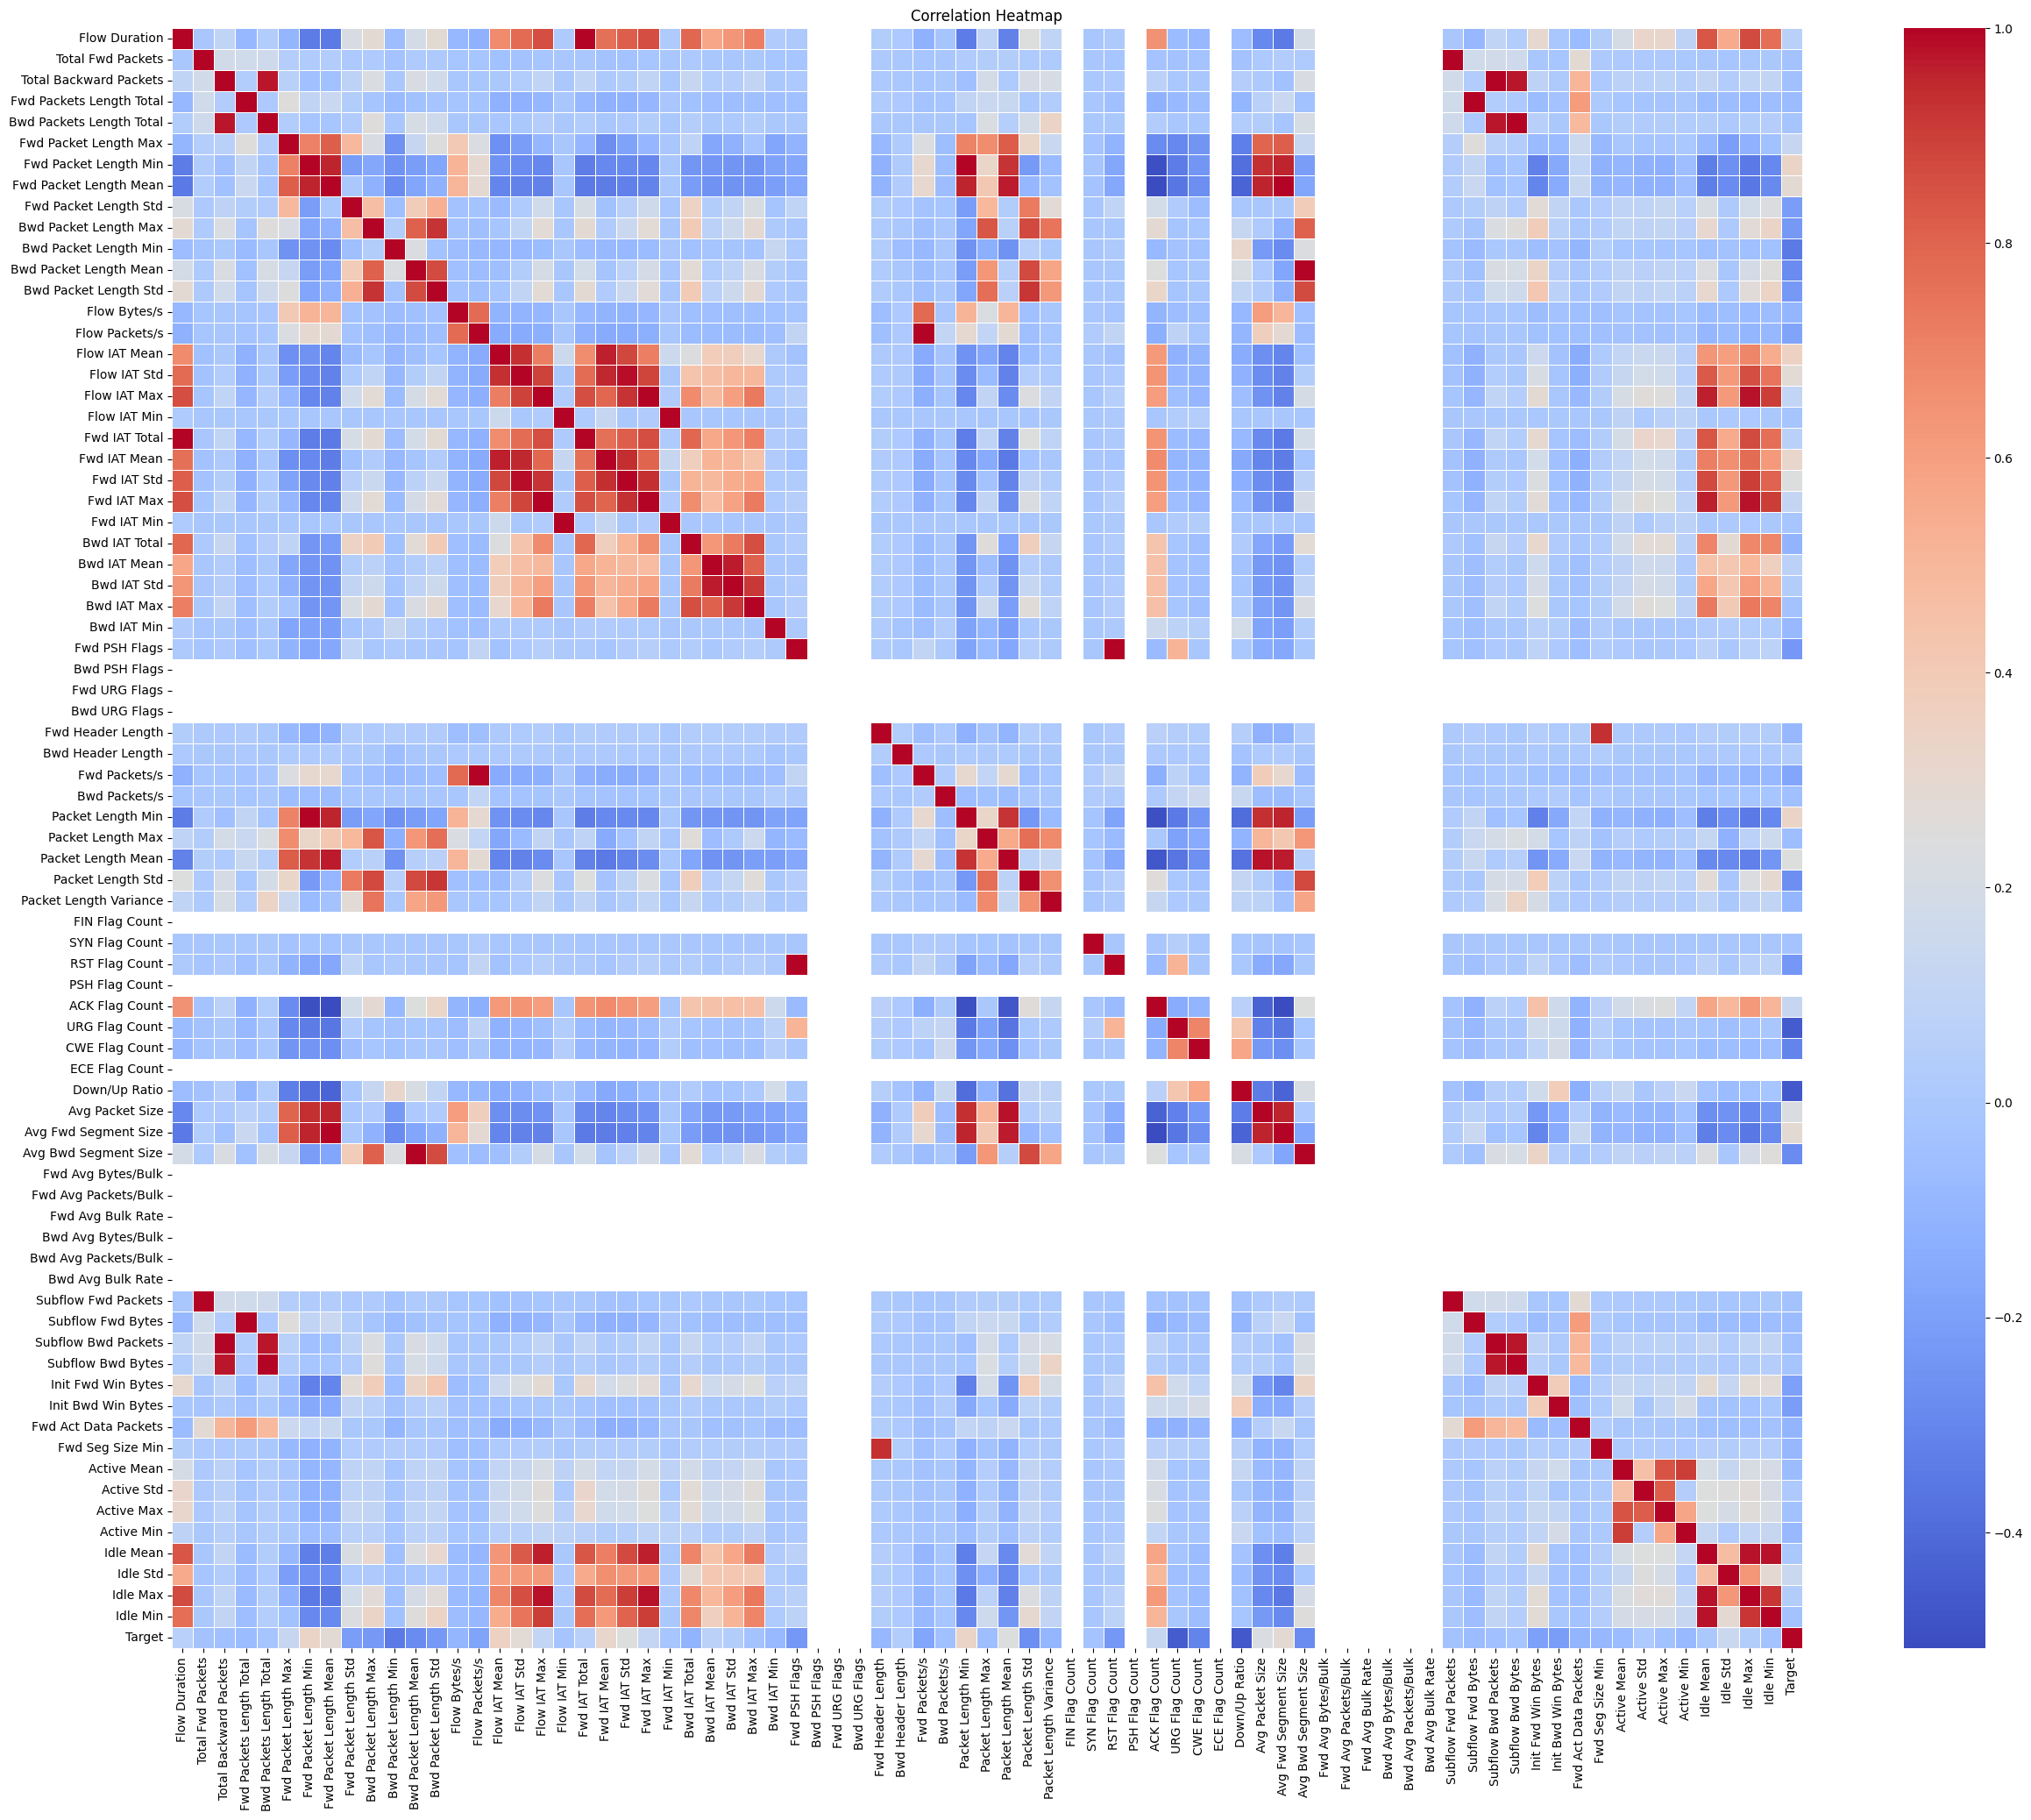

In [10]:
# Visualize correlation using a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

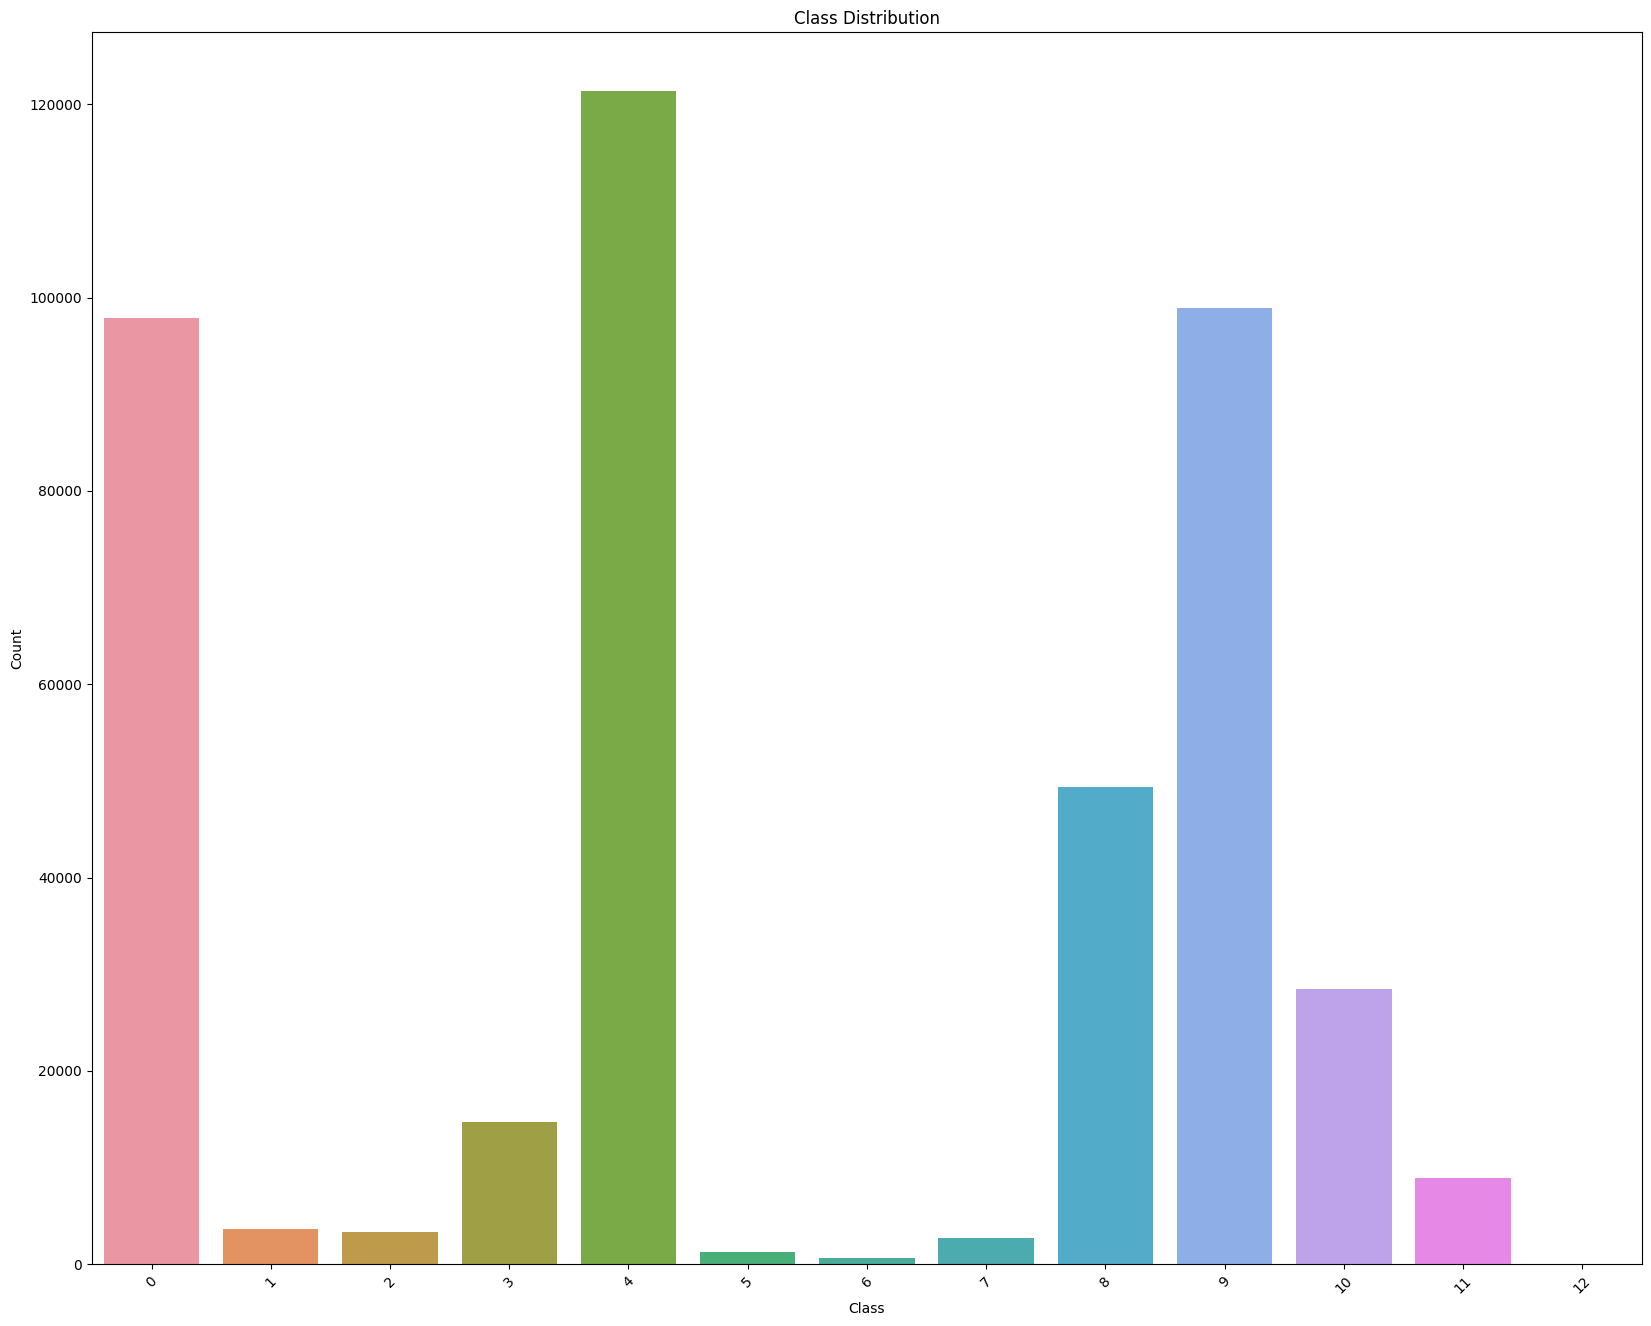

In [11]:
# Visualize class imbalances using a countplot
plt.figure(figsize=(20, 16))
sns.countplot(x='Target', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

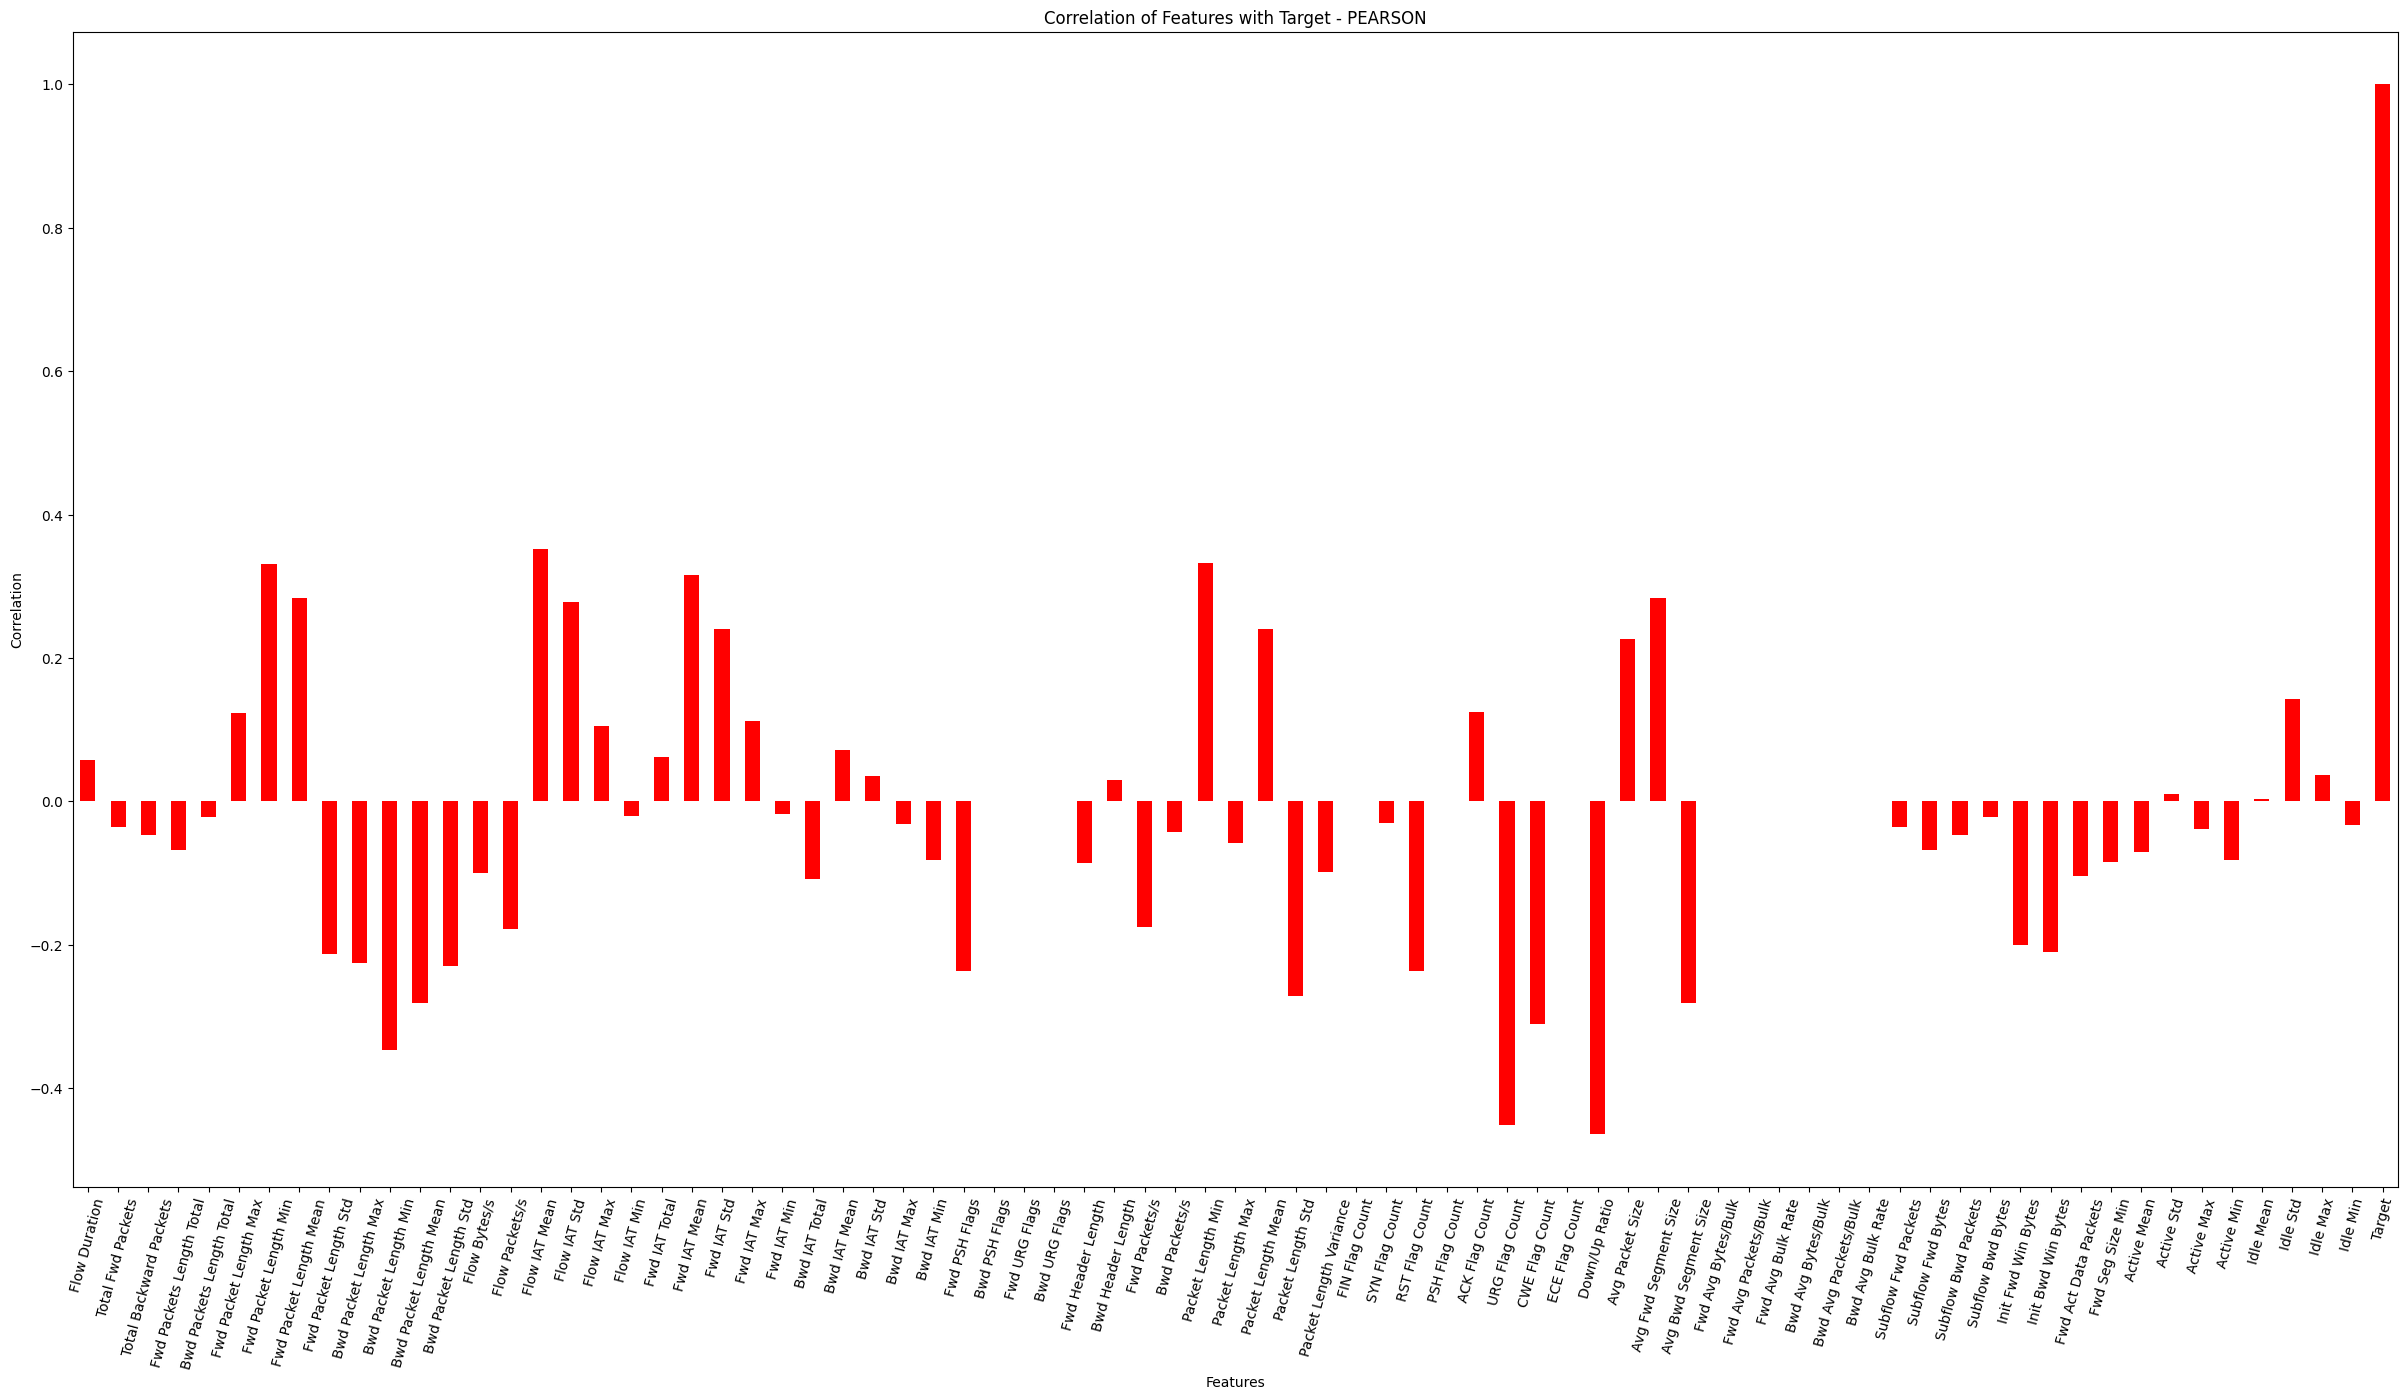

In [12]:
# Filter numerical columns for correlation analysis - Pearson
numerical_columns = df.select_dtypes(include=np.number).columns

# Calculate the correlation of 'Target' with each numerical feature
correlation_with_target = df[numerical_columns].corrwith(df['Target'], method='pearson')

# Plot the correlation with 'Target'
plt.figure(figsize=(30, 15))
correlation_with_target.plot(kind='bar', color='red')
plt.title('Correlation of Features with Target - PEARSON')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=75)
plt.show()


C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


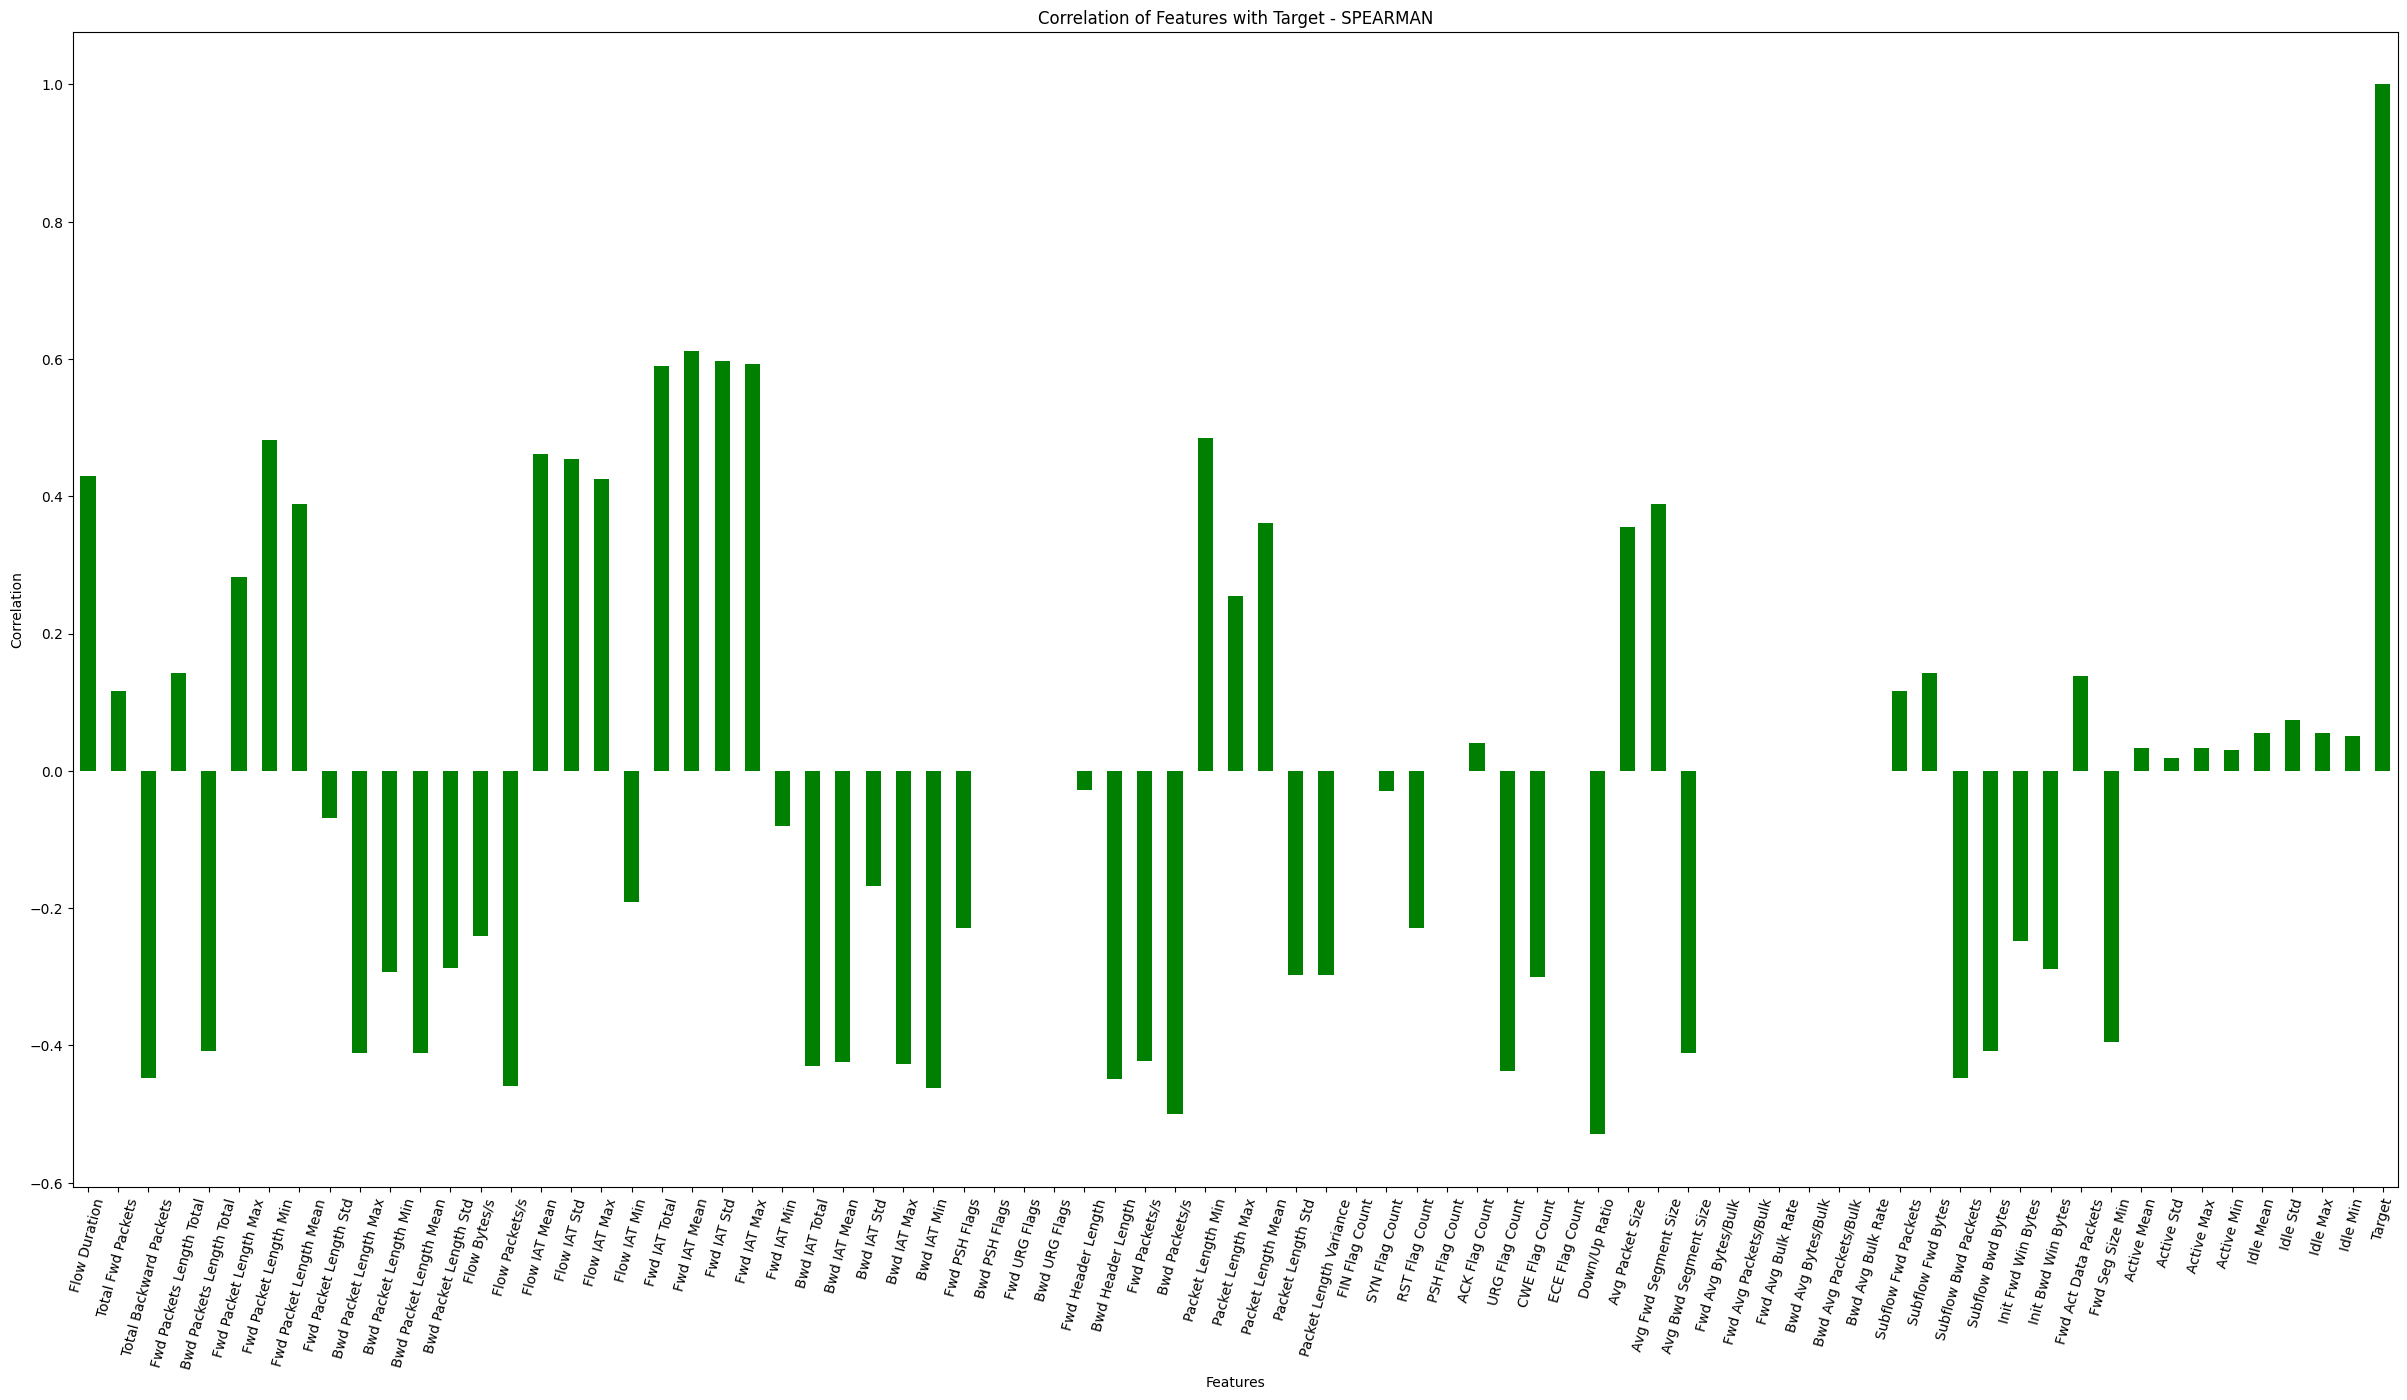

In [13]:
# Filter numerical columns for correlation analysis - Spearman
numerical_columns = df.select_dtypes(include=np.number).columns

# Calculate the correlation of 'Target' with each numerical feature
correlation_with_target = df[numerical_columns].corrwith(df['Target'], method='spearman')

# Plot the correlation with 'Target'
plt.figure(figsize=(30, 15))
correlation_with_target.plot(kind='bar', color='green')
plt.title('Correlation of Features with Target - SPEARMAN')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=75)
plt.show()

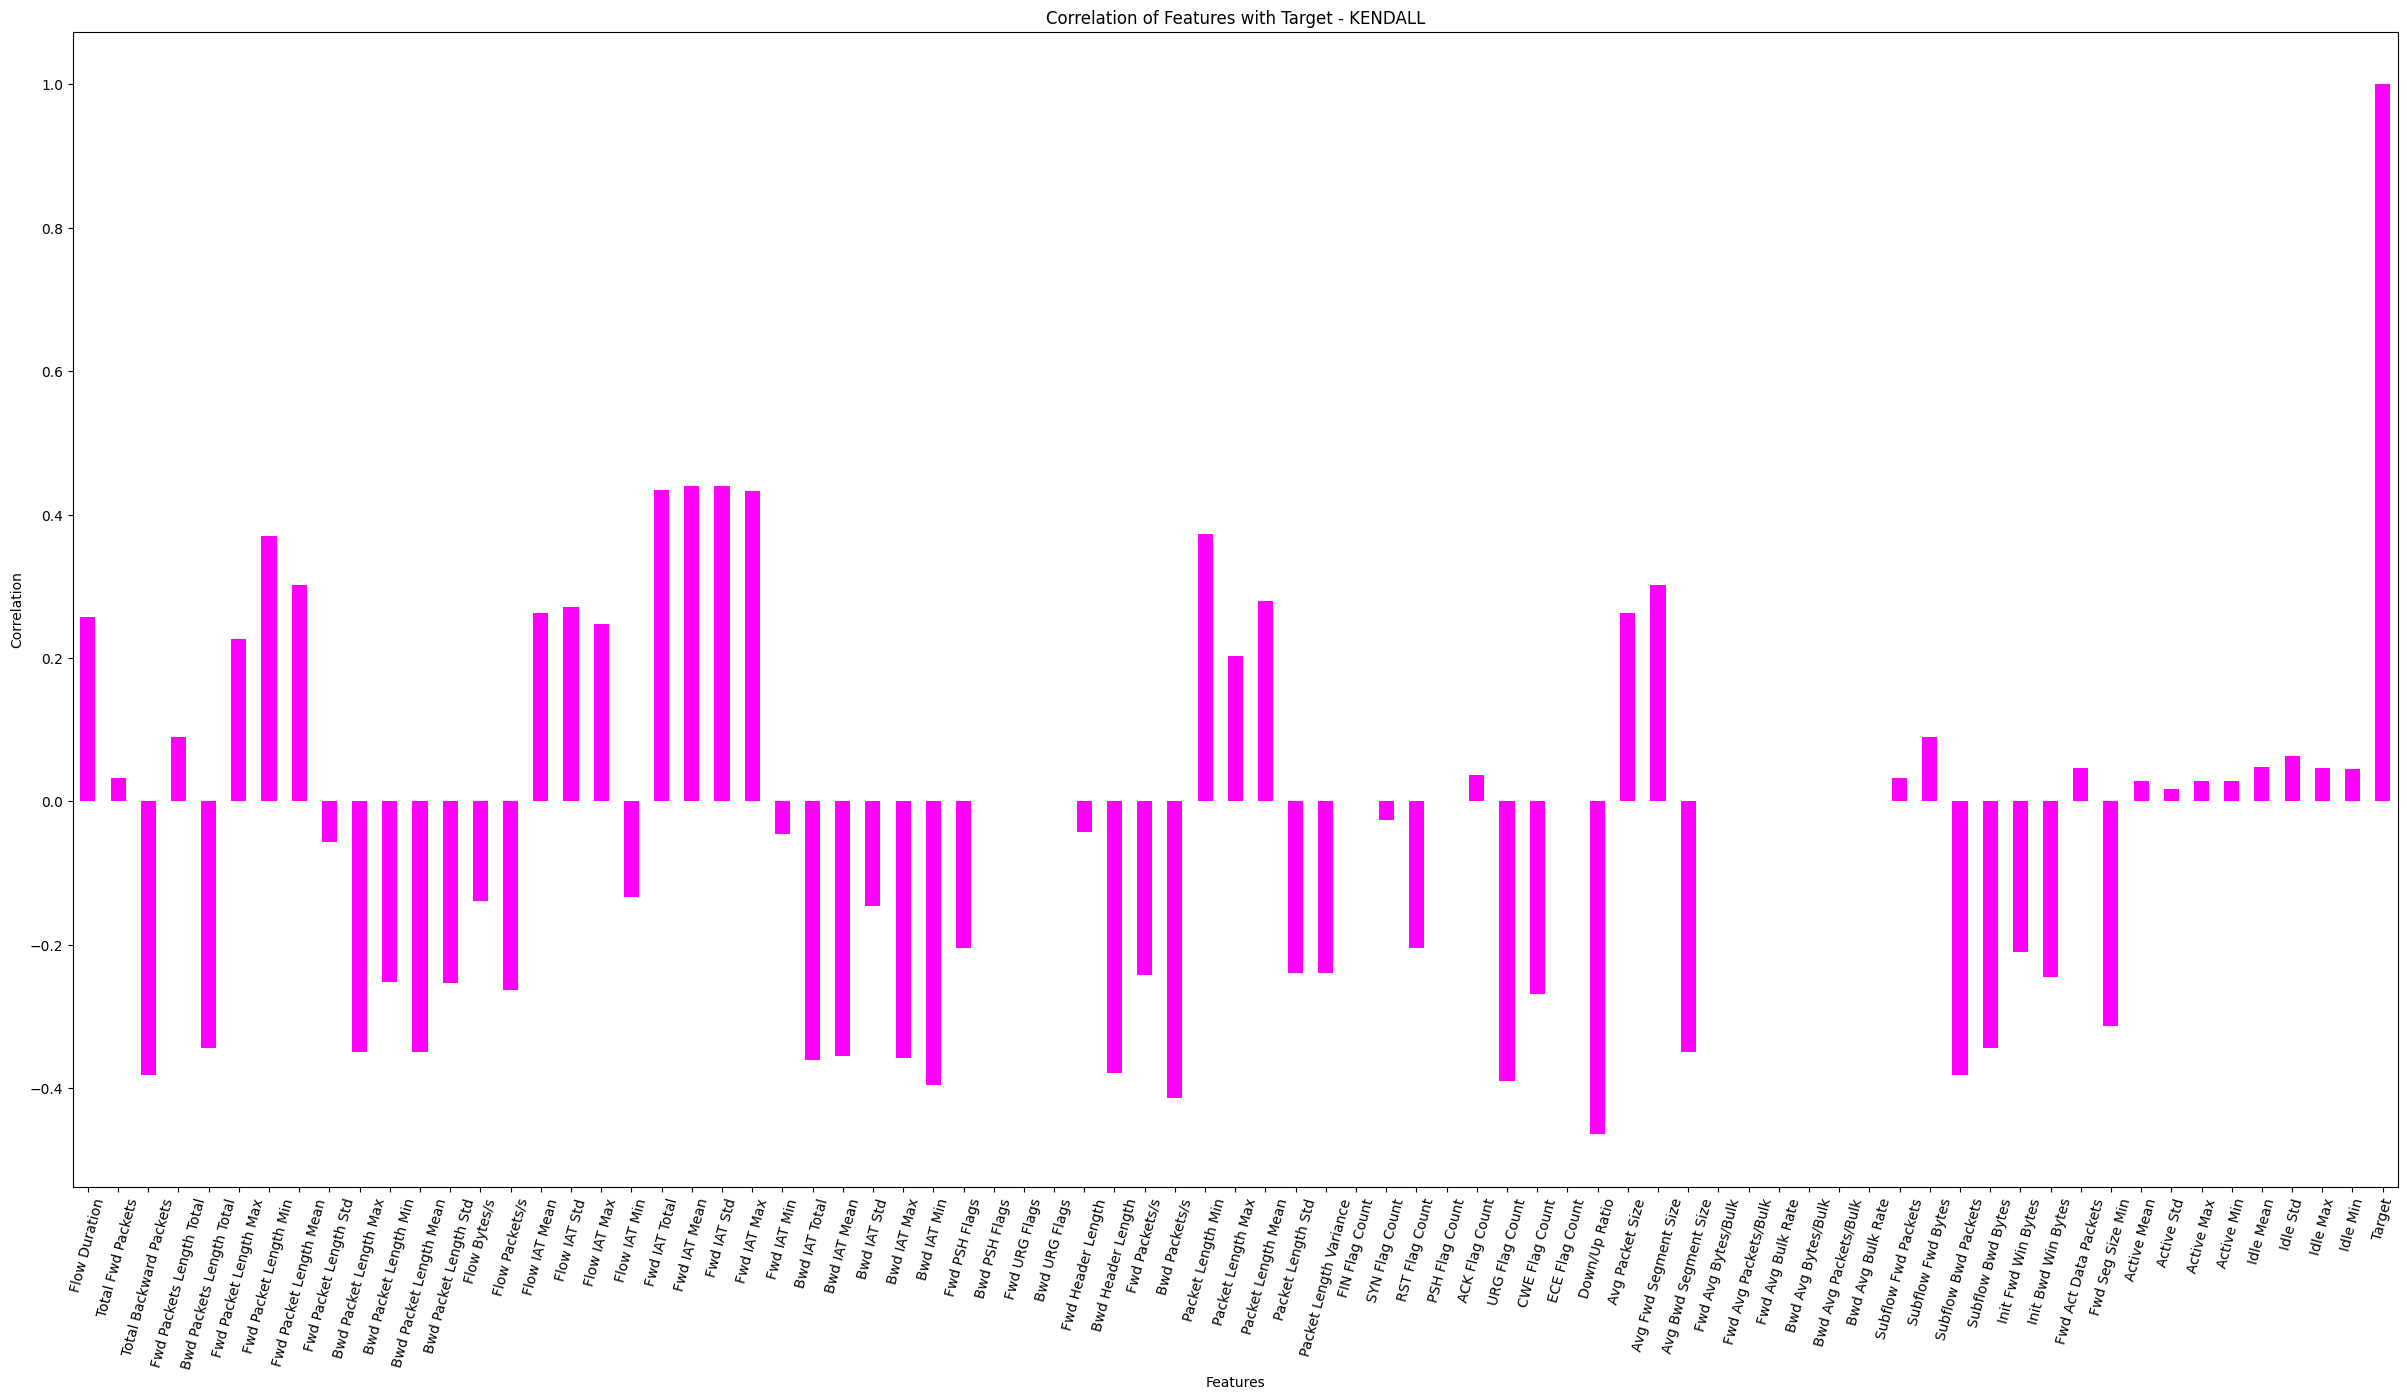

In [14]:
# Filter numerical columns for correlation analysis - Kendall
numerical_columns = df.select_dtypes(include=np.number).columns

# Calculate the correlation of 'Target' with each numerical feature
correlation_with_target = df[numerical_columns].corrwith(df['Target'], method='kendall')

# Plot the correlation with 'Target'
plt.figure(figsize=(30, 15))
correlation_with_target.plot(kind='bar', color='magenta')
plt.title('Correlation of Features with Target - KENDALL')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=75)
plt.show()

## MISSING, NaN, Inf VALUES

In [15]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
missing_values

Missing Values:


Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
Bwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Target                      0
Length: 77, dtype: int64

In [16]:
# Check for NaN values in the DataFrame
nan_values = df.isna().sum()

# Print the count of NaN values for each column
print("NaN Values:")
nan_values

NaN Values:


Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
Bwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Target                      0
Length: 77, dtype: int64

In [17]:
# Check for infinite values in the DataFrame
infinite_values = df.replace([np.inf, -np.inf], np.nan).isnull().sum()

# Print the count of infinite values for each column
print("Infinite Values:")
infinite_values

# deep copy
copydf = df.copy(deep=True)

Infinite Values:


# FEATURE SELECTION

## Step 1: Removing columns having same value in all rows

In [18]:
# Identify columns with the same value in all rows
columns_to_drop = []
for column in df.columns:
    if df[column].nunique() == 1:
        columns_to_drop.append(column)

# Print the names of columns with the same value in all rows
print("Columns with the same value in all rows:", columns_to_drop)

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame after removing the columns
df

Columns with the same value in all rows: ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Target
0,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431367,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431368,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431369,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,97.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Step 2:Removing features which are quasi-static ( with variance less than 0.001)

In [19]:
# Set the variance threshold
threshold = 0.01

# Calculate the variance of each feature
variances = df.var()

# Identify quasi-constant features based on the threshold
quasi_constant_features = variances[variances <= threshold].index.tolist()

# Print the names of quasi-constant features
print("Quasi-Constant Features:", quasi_constant_features)

# Remove quasi-constant features from the DataFrame
df.drop(columns=quasi_constant_features, inplace=True)

# Print the DataFrame after removing quasi-constant features
df

Quasi-Constant Features: ['SYN Flag Count']


,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Target
0,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431367,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431368,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431369,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,97.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Step 3: Removing features which are dulpicates (have same value in each row)

In [20]:
#Removing features which are dulpicates (have same value in each row)

# Function to find and remove all sets of duplicate features
def remove_all_duplicate_features(df):
    duplicate_features = set()
    columns = df.columns

    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if (df[columns[i]] == df[columns[j]]).all():
                duplicate_features.add(columns[j])

    if len(duplicate_features) > 0:
        print("Duplicate Features:", duplicate_features)
        df.drop(columns=duplicate_features, inplace=True)
        return remove_all_duplicate_features(df)  # Recursively check for more duplicates
    else:
        return df

# Call the function to remove all sets of duplicate features
df = remove_all_duplicate_features(df)

# Print the DataFrame after removing all sets of duplicate features
df


Duplicate Features: {'Avg Bwd Segment Size', 'RST Flag Count', 'Subflow Fwd Packets', 'Avg Fwd Segment Size', 'Subflow Bwd Bytes', 'Subflow Fwd Bytes', 'Subflow Bwd Packets'}


,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Target
0,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431367,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,31.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431368,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431369,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,97.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Step 4:Extracting non-correlated features(having correlation < 0.8) using Spearman Correlation

In [21]:
import numpy as np
# Calculate Spearman's correlation matrix
corr_matrix = df.corr(method='spearman')

# Set the correlation threshold
threshold = 0.9

# Find highly correlated pairs of features
correlated_pairs = np.where((np.abs(corr_matrix) >= threshold) & (corr_matrix < 1))

# Create a set to store the features to discard
features_to_discard = set()

# Iterate through the correlated pairs and discard one feature from each pair
for p, q in zip(*correlated_pairs):
    if p != q and p not in features_to_discard:
        features_to_discard.add(df.columns[q])

# Print the names of features to discard
print("Features to Discard:", features_to_discard)

# Remove correlated features from the DataFrame
df.drop(columns=features_to_discard, inplace=True)

# Print the DataFrame after removing correlated features
df

Features to Discard: {'Fwd IAT Std', 'Packet Length Mean', 'Bwd IAT Max', 'Fwd Packets/s', 'Bwd Packets Length Total', 'Packet Length Max', 'Idle Mean', 'Active Max', 'Flow IAT Mean', 'Fwd IAT Max', 'Active Mean', 'Fwd Packet Length Mean', 'Flow IAT Max', 'Flow IAT Std', 'Bwd Packet Length Max', 'Flow Duration', 'Bwd Packets/s', 'Total Backward Packets', 'Bwd IAT Mean', 'Active Min', 'Idle Max', 'Bwd Header Length', 'Bwd IAT Min', 'Fwd Act Data Packets', 'Total Fwd Packets', 'Avg Packet Size', 'Fwd IAT Mean', 'Fwd IAT Total', 'Idle Std', 'Flow Packets/s', 'Bwd IAT Total', 'Packet Length Min', 'Active Std', 'Bwd Packet Length Mean', 'Idle Min', 'Fwd Packet Length Max', 'Fwd Packet Length Min'}


,Fwd Packets Length Total,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow Bytes/s,Flow IAT Min,Fwd IAT Min,Bwd IAT Std,Fwd PSH Flags,Fwd Header Length,Packet Length Std,Packet Length Variance,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Seg Size Min,Target
0,2088.0,35.088460,0.0,0.000000,9.638510e+03,0.0,0.0,0.000000,0,96,33.617596,1130.1428,0,0,0,0.0,-1,-1,14,10
1,802.0,0.000000,0.0,0.000000,4.010000e+08,2.0,2.0,0.000000,0,40,0.000000,0.0000,0,0,0,0.0,-1,-1,20,10
2,766.0,0.000000,0.0,0.000000,1.595833e+07,48.0,48.0,0.000000,0,40,0.000000,0.0000,0,0,0,0.0,-1,-1,20,10
3,1398.0,22.516660,0.0,0.000000,1.302658e+04,0.0,0.0,0.000000,0,80,21.361180,456.3000,0,0,0,0.0,-1,-1,20,10
4,1438.0,34.063667,0.0,0.000000,1.340530e+04,1.0,1.0,0.000000,0,32,32.315630,1044.3000,0,0,0,0.0,-1,-1,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,0.0,0.000000,31.0,0.000000,5.628790e+01,3.0,3.0,0.000000,0,40,15.500000,240.2500,0,1,0,0.0,30016,64095,20,0
431367,31.0,0.000000,0.0,17.897858,2.753386e+02,1.0,0.0,1.414214,1,20,13.863622,192.2000,0,1,1,3.0,64095,30016,20,0
431368,0.0,0.000000,0.0,0.000000,0.000000e+00,3.0,0.0,0.000000,0,20,0.000000,0.0000,0,1,1,2.0,30016,0,20,0
431369,86.0,0.000000,97.0,0.000000,5.868914e+03,3.0,3.0,0.000000,0,40,29.577019,874.8000,0,0,0,1.0,-1,-1,20,0


In [22]:
copydf1 = df.copy(deep=True)

## Step 5: Using the Random Forest (RF) method to extract the best features based on Gini impurity

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Separate the features (F) and the target variable (Target)
X = df.drop(columns=['Target'])
y = df['Target']

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the data
rf_classifier.fit(X, y)

# Get feature importances (Gini impurity) from the trained Random Forest
feature_importances = rf_classifier.feature_importances_

# Create a dictionary to store feature names and their corresponding importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort the features by importance (in descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")



Flow Bytes/s: 0.23864118068338203
Fwd Packets Length Total: 0.2085235366211349
Init Fwd Win Bytes: 0.08077033687598573
Packet Length Variance: 0.051702083467458027
Packet Length Std: 0.05083348119429648
Down/Up Ratio: 0.04847392506275505
Flow IAT Min: 0.047532188806543266
ACK Flag Count: 0.04026570817097071
Init Bwd Win Bytes: 0.039465979463115614
Fwd Seg Size Min: 0.039243194320140284
Bwd Packet Length Min: 0.038500030920923745
Fwd Packet Length Std: 0.029187575228714957
Fwd IAT Min: 0.027156265272673515
Fwd Header Length: 0.026143514798387103
URG Flag Count: 0.021700575351953418
Bwd IAT Std: 0.004898402857301878
CWE Flag Count: 0.0032390286998659912
Bwd Packet Length Std: 0.002518637702392731
Fwd PSH Flags: 0.0012043545020045748


In [24]:
#Calculation Accuracy of Selected Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

selected_columns=[]
# Define the selected columns based on your feature selection
for feature, importance in sorted_features:
    selected_columns.append(feature)

# Split the DataFrame into features (X) and target (y) based on the selected columns
X = df[selected_columns]
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier with the same parameters
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using selected columns:", accuracy)


Accuracy using selected columns: 0.971683569979716


In [25]:
df


,Fwd Packets Length Total,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow Bytes/s,Flow IAT Min,Fwd IAT Min,Bwd IAT Std,Fwd PSH Flags,Fwd Header Length,Packet Length Std,Packet Length Variance,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Seg Size Min,Target
0,2088.0,35.088460,0.0,0.000000,9.638510e+03,0.0,0.0,0.000000,0,96,33.617596,1130.1428,0,0,0,0.0,-1,-1,14,10
1,802.0,0.000000,0.0,0.000000,4.010000e+08,2.0,2.0,0.000000,0,40,0.000000,0.0000,0,0,0,0.0,-1,-1,20,10
2,766.0,0.000000,0.0,0.000000,1.595833e+07,48.0,48.0,0.000000,0,40,0.000000,0.0000,0,0,0,0.0,-1,-1,20,10
3,1398.0,22.516660,0.0,0.000000,1.302658e+04,0.0,0.0,0.000000,0,80,21.361180,456.3000,0,0,0,0.0,-1,-1,20,10
4,1438.0,34.063667,0.0,0.000000,1.340530e+04,1.0,1.0,0.000000,0,32,32.315630,1044.3000,0,0,0,0.0,-1,-1,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,0.0,0.000000,31.0,0.000000,5.628790e+01,3.0,3.0,0.000000,0,40,15.500000,240.2500,0,1,0,0.0,30016,64095,20,0
431367,31.0,0.000000,0.0,17.897858,2.753386e+02,1.0,0.0,1.414214,1,20,13.863622,192.2000,0,1,1,3.0,64095,30016,20,0
431368,0.0,0.000000,0.0,0.000000,0.000000e+00,3.0,0.0,0.000000,0,20,0.000000,0.0000,0,1,1,2.0,30016,0,20,0
431369,86.0,0.000000,97.0,0.000000,5.868914e+03,3.0,3.0,0.000000,0,40,29.577019,874.8000,0,0,0,1.0,-1,-1,20,0


In [26]:
top_15=[sorted_features[i][0] for i in range(15)]
for x in top_15:
    print(x)
top_15+=["Target"]
len(top_15)

Flow Bytes/s
Fwd Packets Length Total
Init Fwd Win Bytes
Packet Length Variance
Packet Length Std
Down/Up Ratio
Flow IAT Min
ACK Flag Count
Init Bwd Win Bytes
Fwd Seg Size Min
Bwd Packet Length Min
Fwd Packet Length Std
Fwd IAT Min
Fwd Header Length
URG Flag Count


16

In [29]:
# Specify the columns to export
columns_to_export = top_15
selected_df = df[columns_to_export]

# Export the selected DataFrame to a CSV file
selected_df.to_csv('final_dataset.csv', index=False)

# Other Feature Selection Methods

1. Forward Selection and Backward Rejection Methods

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the DataFrame into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Forward Selection
selected_features_forward = []
best_accuracy_forward = 0.0

while len(selected_features_forward) < len(X_train.columns):
    candidate_features = [feature for feature in X_train.columns if feature not in selected_features_forward]
    accuracies = []

    for feature in candidate_features:
        temp_features = selected_features_forward + [feature]
        clf.fit(X_train[temp_features], y_train)
        y_pred = clf.predict(X_test[temp_features])
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((feature, accuracy))

    best_candidate_forward, best_accuracy_candidate_forward = max(accuracies, key=lambda x: x[1])

    if best_accuracy_candidate_forward > best_accuracy_forward:
        selected_features_forward.append(best_candidate_forward)
        best_accuracy_forward = best_accuracy_candidate_forward
    else:
        break

print("Selected Features (Forward Selection):", selected_features_forward)
print("Best Accuracy (Forward Selection):", best_accuracy_forward)

# Backward Elimination
selected_features_backward = X_train.columns.tolist()
best_accuracy_backward = 0.0

while len(selected_features_backward) > 0:
    accuracies = []

    for feature in selected_features_backward:
        temp_features = [f for f in selected_features_backward if f != feature]
        clf.fit(X_train[temp_features], y_train)
        y_pred = clf.predict(X_test[temp_features])
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((feature, accuracy))

    worst_candidate_backward, worst_accuracy_candidate_backward = min(accuracies, key=lambda x: x[1])

    if worst_accuracy_candidate_backward >= best_accuracy_backward:
        selected_features_backward.remove(worst_candidate_backward)
        best_accuracy_backward = worst_accuracy_candidate_backward
    else:
        break

print("Selected Features (Backward Elimination):", selected_features_backward)
print("Best Accuracy (Backward Elimination):", best_accuracy_backward)


Selected Features (Forward Selection): ['Fwd Packets Length Total', 'Init Fwd Win Bytes', 'Packet Length Std', 'Init Bwd Win Bytes', 'Fwd IAT Min', 'Bwd IAT Std', 'CWE Flag Count']
Best Accuracy (Forward Selection): 0.9779310344827586
Selected Features (Backward Elimination): ['Fwd Packet Length Std', 'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Min', 'Fwd IAT Min', 'Bwd IAT Std', 'Fwd PSH Flags', 'Fwd Header Length', 'Packet Length Std', 'Packet Length Variance', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Seg Size Min']
Best Accuracy (Backward Elimination): 0.9682642712257317


In [ ]:
import pandas as pd

# Load your original dataset
original_data = pd.read_csv('your_original_dataset.csv')

# Select and keep only the columns you want
selected_columns = original_data[['Fwd Packets Length Total', 'Init Fwd Win Bytes', 'Packet Length Std', 'Init Bwd Win Bytes', 'Fwd IAT Min', 'Bwd IAT Std', 'CWE Flag Count']]

# Optionally, you can save the new dataset to a new CSV file
selected_columns.to_csv('new_dataset.csv', index=False)


# Modeling

### 1) Logistic Regression

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
data = copydf1.copy(deep=True)

In [71]:
data

,Fwd Packets Length Total,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow Bytes/s,Flow IAT Min,Fwd IAT Min,Bwd IAT Std,Fwd PSH Flags,Fwd Header Length,Packet Length Std,Packet Length Variance,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Seg Size Min,Target
0,2088.0,35.088460,0.0,0.000000,9.638510e+03,0.0,0.0,0.000000,0,96,33.617596,1130.1428,0,0,0,0.0,-1,-1,14,10
1,802.0,0.000000,0.0,0.000000,4.010000e+08,2.0,2.0,0.000000,0,40,0.000000,0.0000,0,0,0,0.0,-1,-1,20,10
2,766.0,0.000000,0.0,0.000000,1.595833e+07,48.0,48.0,0.000000,0,40,0.000000,0.0000,0,0,0,0.0,-1,-1,20,10
3,1398.0,22.516660,0.0,0.000000,1.302658e+04,0.0,0.0,0.000000,0,80,21.361180,456.3000,0,0,0,0.0,-1,-1,20,10
4,1438.0,34.063667,0.0,0.000000,1.340530e+04,1.0,1.0,0.000000,0,32,32.315630,1044.3000,0,0,0,0.0,-1,-1,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,0.0,0.000000,31.0,0.000000,5.628790e+01,3.0,3.0,0.000000,0,40,15.500000,240.2500,0,1,0,0.0,30016,64095,20,0
431367,31.0,0.000000,0.0,17.897858,2.753386e+02,1.0,0.0,1.414214,1,20,13.863622,192.2000,0,1,1,3.0,64095,30016,20,0
431368,0.0,0.000000,0.0,0.000000,0.000000e+00,3.0,0.0,0.000000,0,20,0.000000,0.0000,0,1,1,2.0,30016,0,20,0
431369,86.0,0.000000,97.0,0.000000,5.868914e+03,3.0,3.0,0.000000,0,40,29.577019,874.8000,0,0,0,1.0,-1,-1,20,0


In [73]:
# Load your dataset (replace 'your_dataset.csv' with your data)
#data = pd.read_csv('your_dataset.csv')
#Three dataset with features got from RF, forward selection and backward rejection
# Select and keep only the columns you want
selected_features_forward= ['Fwd Packets Length Total', 'Init Fwd Win Bytes', 'Packet Length Std', 'Init Bwd Win Bytes', 'Fwd IAT Min', 'Bwd IAT Std', 'CWE Flag Count','Target']
selected_features_backward= ['Fwd Packet Length Std', 'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Min', 'Fwd IAT Min', 'Bwd IAT Std','Target', 'Fwd PSH Flags', 'Fwd Header Length', 'Packet Length Std', 'Packet Length Variance', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Seg Size Min']
data1 = data[top_15]
data2 = data[selected_features_backward]
data3 = data[selected_features_backward]



In [31]:
data1=pd.read_csv("final_dataset.csv")
data1

,Flow Bytes/s,Fwd Packets Length Total,Init Fwd Win Bytes,Packet Length Variance,Packet Length Std,Down/Up Ratio,Flow IAT Min,ACK Flag Count,Init Bwd Win Bytes,Fwd Seg Size Min,Bwd Packet Length Min,Fwd Packet Length Std,Fwd IAT Min,Fwd Header Length,URG Flag Count,Target
0,9.638510e+03,2088.0,-1,1130.1428,33.617596,0.0,0.0,0,-1,14,0.0,35.088460,0.0,96,0,10
1,4.010000e+08,802.0,-1,0.0000,0.000000,0.0,2.0,0,-1,20,0.0,0.000000,2.0,40,0,10
2,1.595833e+07,766.0,-1,0.0000,0.000000,0.0,48.0,0,-1,20,0.0,0.000000,48.0,40,0,10
3,1.302658e+04,1398.0,-1,456.3000,21.361180,0.0,0.0,0,-1,20,0.0,22.516660,0.0,80,0,10
4,1.340530e+04,1438.0,-1,1044.3000,32.315630,0.0,1.0,0,-1,8,0.0,34.063667,1.0,32,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,5.628790e+01,0.0,30016,240.2500,15.500000,0.0,3.0,0,64095,20,31.0,0.000000,3.0,40,1,0
431367,2.753386e+02,31.0,64095,192.2000,13.863622,3.0,1.0,0,30016,20,0.0,0.000000,0.0,20,1,0
431368,0.000000e+00,0.0,30016,0.0000,0.000000,2.0,3.0,0,0,20,0.0,0.000000,0.0,20,1,0
431369,5.868914e+03,86.0,-1,874.8000,29.577019,1.0,3.0,0,-1,20,97.0,0.000000,3.0,40,0,0


In [32]:
y = data1['Target']  # Target variable
X = data1.drop('Target', axis=1)  # Features


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
logistic_reg = LogisticRegression(C = 0.001, penalty = 'l1',solver= 'liblinear')


In [87]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Type of penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'C': [0.01, 0.1, 1.0],  # Regularization strength
    'solver': [ 'lbfgs', 'liblinear'],  # Solver algorithms
}

In [88]:
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aarth\AppData\Roaming\Python\Python311\site-p

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']})

In [93]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [98]:
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19619
           1       0.00      0.00      0.00       748
           2       0.00      0.00      0.00       638
           3       0.59      0.67      0.63      2941
           4       0.90      0.90      0.90     24300
           5       0.00      0.00      0.00       224
           6       0.00      0.00      0.00       124
           7       0.00      0.00      0.00       557
           8       0.87      0.99      0.93      9847
           9       0.88      0.99      0.93     19869
          10       0.85      0.87      0.86      5630
          11       0.00      0.00      0.00      1763
          12       0.00      0.00      0.00        15

    accuracy                           0.90     86275
   macro avg       0.39      0.42      0.40     86275
weighted avg       0.86      0.90      0.87     86275



C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and 

## Random Forest

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    # 'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Split quality criterion
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [35]:
print("Best RF Hyperparameters:")
print(best_params_rf)

Best RF Hyperparameters:
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}


In [36]:
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19619
           1       0.58      0.36      0.44       748
           2       0.56      0.60      0.58       638
           3       0.88      0.96      0.91      2941
           4       1.00      1.00      1.00     24300
           5       0.63      0.65      0.64       224
           6       0.52      0.35      0.42       124
           7       0.61      0.69      0.65       557
           8       1.00      0.99      0.99      9847
           9       1.00      1.00      1.00     19869
          10       0.92      0.97      0.95      5630
          11       0.90      0.76      0.83      1763
          12       0.20      0.07      0.10        15

    accuracy                           0.98     86275
   macro avg       0.75      0.72      0.73     86275
weighted avg       0.98      0.98      0.98     86275



In [37]:
pip install joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import joblib

# Your trained machine learning model
model = best_estimator

# Save the model to a file
joblib.dump(model, 'your_model.pkl')


['your_model.pkl']

In [7]:
import joblib

# Load the saved model
loaded_model = joblib.load('your_model.pkl')

# Prepare new input data (replace with your actual data)
new_data = [[9638.51,2088,-1,1130.1428,33.617596,0,0,0,-1,14,0,35.08846,0,96,0],[43601.055,2376.0,704,335492.56,579.2172,0.0,1.0,0,422,32,240.0,685.8921,1.0,128,1]]  # For example, a list of features

# Make predictions with the loaded model
predictions = loaded_model.predict(new_data)

# Display the predictions
print("Predictions:", predictions)
for i in range(len(predictions)):
    print("Prediction",i+1,':',reverse_encoding[predictions[i]])


Predictions: [10  0]
Prediction 1 : UDP
Prediction 2 : Benign


C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Gradient boost

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
gb_classifier = GradientBoostingClassifier()


In [106]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking to prevent overfitting
      # Maximum depth of individual trees
    'max_features':['sqrt', 'log2', None]  # Number of features to consider for the best split
}
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


In [108]:
best_gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05,
                                               max_depth=10, max_features='sqrt')



In [109]:
best_gb_classifier.fit(X_train, y_train)
y_pred_gb = best_gb_classifier.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.47      0.63     19619
           1       0.39      0.34      0.36       748
           2       0.20      0.60      0.30       638
           3       0.41      0.93      0.57      2941
           4       0.97      0.98      0.97     24300
           5       0.11      0.54      0.19       224
           6       0.01      0.24      0.02       124
           7       0.15      0.62      0.24       557
           8       0.85      0.51      0.63      9847
           9       0.94      1.00      0.97     19869
          10       0.84      0.96      0.90      5630
          11       0.34      0.57      0.43      1763
          12       0.01      0.13      0.03        15

    accuracy                           0.79     86275
   macro avg       0.48      0.61      0.48     86275
weighted avg       0.88      0.79      0.81     86275



## KNN

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
knn_classifier = KNeighborsClassifier()


In [113]:
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute nearest neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Distance metric
    'n_jobs': [-1, 1]  # Number of CPU cores to use for parallel computation
}

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.95984596 0.95984596 0.96096449 0.96096449 0.95894186 0.95894186
 0.95984596 0.95984596 0.95979959 0.95979959 0.96096449 0.96096449
 0.95890129 0.95890129 0.95979959 0.95979959 0.95984596 0.95984596
 0.96096449 0.96096449 0.95894186 0.95894186 0.95984596 0.95984596
        nan        nan        nan        nan        nan        nan
        nan        nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_jobs': [-1, 1]})

In [114]:
best_params_knn = grid_search.best_params_
print("Best K-Nearest Neighbors Hyperparameters:")
print(best_params_knn)


Best K-Nearest Neighbors Hyperparameters:
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_jobs': -1}


In [115]:
best_alogorithm = best_params_knn['algorithm']
best_mertic = best_params_knn['metric']
best_n_jobs = best_params_knn['n_jobs']

best_knn_classifier = KNeighborsClassifier(algorithm=best_alogorithm,metric=best_mertic, n_jobs=best_n_jobs)
best_knn_classifier.fit(X_train, y_train)
y_pred_knn = best_knn_classifier.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19619
           1       0.42      0.29      0.35       748
           2       0.53      0.61      0.57       638
           3       0.81      0.89      0.85      2941
           4       0.97      0.99      0.98     24300
           5       0.64      0.61      0.62       224
           6       0.29      0.08      0.13       124
           7       0.74      0.47      0.58       557
           8       0.99      0.99      0.99      9847
           9       1.00      0.99      0.99     19869
          10       0.91      0.93      0.92      5630
          11       0.92      0.72      0.81      1763
          12       0.00      0.00      0.00        15

    accuracy                           0.96     86275
   macro avg       0.71      0.66      0.67     86275
weighted avg       0.96      0.96      0.96     86275



## SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.25],  # Regularization parameter
    'tol': [1e-5]  # Tolerance for stopping criteria
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Find the best hyperparameters and store them as a separate variable
best_params_svm = grid_search.best_params_
print("Best SVM Hyperparameters:")
print(best_params_svm)

# Create an SVM classifier with the best parameters
best_svm_classifier = SVC(C=best_params_svm['C'], tol=best_params_svm['tol'])

# Evaluate the SVM model
best_svm_classifier.fit(X_train, y_train)
y_pred_svm = best_svm_classifier.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


Best SVM Hyperparameters:
{'C': 0.25, 'tol': 1e-05}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.96      0.46     19619
           1       0.25      0.00      0.00       748
           2       0.59      0.35      0.44       638
           3       0.62      0.72      0.67      2941
           4       0.87      0.68      0.77     24300
           5       0.00      0.00      0.00       224
           6       0.00      0.00      0.00       124
           7       0.50      0.31      0.39       557
           8       0.00      0.00      0.00      9847
           9       0.75      0.05      0.10     19869
          10       0.47      0.01      0.02      5630
          11       0.00      0.00      0.00      1763
          12       0.00      0.00      0.00        15

    accuracy                           0.45     86275
   macro avg       0.34      0.24      0.22     86275
weighted avg       0.55      0.45      0.37     86275



C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)